# Advanced Search
`jskyzero` `2017/10/23`

This part is about use some advanced search methods to seach answer in the variables space.

In [1]:
import heapq
import math
import random
import copy
import numpy as np
import matplotlib.pyplot as plt
from abc import ABCMeta,  abstractmethod

class SearchObjectBase(metaclass=ABCMeta):
    def __init__(self, initial_state):
        """initial state"""
        self.now_state = initial_state
        self.produced = 0
        self.traveled = set()
        self.traveled.add(tuple(self.now_state))
    
    @abstractmethod        
    def test_finished(self):
        """check is final state"""
        pass
    
    @abstractmethod 
    def produce_next(self):
        """produce next state"""
        pass
    
    @abstractmethod 
    def state_weight(self, state):
        """check state similarity to finished_state"""
        pass
    
    @abstractmethod 
    def random_restart(self):
        """random_select_a_state"""
        pass

    def select_best_next(self):
        next_states = []
        for next_state in self.produce_next():
#             print(next_state, self.state_weight(next_state) - self.state_weight(self.now_state))
            if (self.state_weight(next_state) > self.state_weight(self.now_state)) and (not tuple(next_state) in self.traveled):
                heapq.heappush(next_states, (-self.state_weight(next_state), next_state))
        if len(next_states):
            self.produced = self.produced + len(self.produce_next())
            top_state = heapq.heappop(next_states)[-1]
            self.traveled.add(tuple(top_state))
            return top_state
        else:
            return None
    

    def select_random_better_next(self):
        next_states = self.produce_next()
        while (len(next_states)):
            index = random.randint(0, len(next_states) - 1)
            next_state = next_states.pop(index)
            # print(self.state_weight(next_state) - self.state_weight(self.now_state))
            self.produced = self.produced + 1
            if (self.state_weight(next_state) > self.state_weight(self.now_state)) and (not tuple(next_state) in self.traveled):
                self.traveled.add(tuple(next_state))
                return next_state
        return None
        
    def select_random_next(self):
        next_states = self.produce_next()
        while (len(next_states)):
            index = random.randint(0, len(next_states) - 1)
            next_state = next_states.pop(index)
            self.produced = self.produced + 1
            self.traveled.add(tuple(next_state))
            return next_state
        return None

class EightDigit(SearchObjectBase):
    def __init__(self, initial_state, final_state):
        super().__init__(initial_state)
        self.final_state = final_state
        
    def test_finished(self):
        """check is final state"""
        return self.now_state == self.final_state
    
    def produce_next(self):
        """produce next state"""
        next_states = []
        # 0 1 2
        # 3 4 5
        # 6 7 8
        index = self.now_state.index(0)
        if index % 3 == 0:
            next_states.append(self.swap(index, index + 1))
        if index % 3 == 1:
            next_states.append(self.swap(index, index - 1))
            next_states.append(self.swap(index, index + 1))
        if index % 3 == 2:
            next_states.append(self.swap(index, index - 1))
        if index // 3 == 0:
            next_states.append(self.swap(index, index + 3))
        if index // 3 == 1:
            next_states.append(self.swap(index, index - 3))
            next_states.append(self.swap(index, index + 3))
        if index // 3 == 2:
            next_states.append(self.swap(index, index - 3))
        return next_states
 
    def state_weight(self, state):
        space = 0
        for i in range(0, 9, 1):
            j = self.final_state.index(state[i])
            space = space + abs(j % 3 - i % 3) + abs(j // 3 - i // 3)
        return -space

    def random_restart(self):
        """random_select_a_state"""
        self.now_state = self.final_state[:]
        random.shuffle(self.now_state)
        self.traveled = set()
        self.traveled.add(tuple(self.now_state))
        self.produced = 0
        
    def random_restart2(self):
        """random_select_a_state"""
        self.now_state = self.final_state[:]
        for x in range(20):
            self.now_state = random.choice(self.produce_next())
        self.traveled = set()
        self.traveled.add(tuple(self.now_state))
        self.produced = 0
        
    def swap(self, left, right):
        new_state = self.now_state[:]
        temp = new_state[left]
        new_state[left] = new_state[right]
        new_state[right] = temp
        return new_state

class Eightqueens(SearchObjectBase):
    def __init__(self, initial_state):
        super().__init__(initial_state)
    
        
    def test_finished(self):
        """check is final state"""
        return self.state_weight(self.now_state) == 0
    
    def produce_next(self):
        """produce next state"""
        can_select = []
        next_states = []
        for x in self.now_state:
            each_can_select = list(range(0,8))
            each_can_select.pop(x)
            can_select.append(each_can_select)
        for i in range(0, 8):
            for j in range(0, 7):
                next_state = self.now_state[:]
                next_state[i] = can_select[i][j]
                next_states.append(next_state)
        return next_states
        
        
        return next_states
 
    def state_weight(self, state):
        bad_times = 0
        for i in range(0, 8):
            for j in range(i, 8):
                if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
                    bad_times = bad_times + 1
        return -bad_times

    def random_restart(self):
        """random_select_a_state"""
        self.now_state = random.choice(self.produce_next())
        self.traveled = set()
        self.traveled.add(tuple(self.now_state))
        self.produced = 0

def steepest_ascent(problem):
    while 1:
        next_state=problem.select_best_next()
        if next_state:
            problem.now_state=next_state
            if (problem.test_finished()):
                return (1, len(problem.traveled), problem.produced)
        else:
            return (0, len(problem.traveled), problem.produced)

def first_choice_variants(problem):
    while 1:
        next_state = problem.select_random_better_next()
        if next_state:
            problem.now_state = next_state
            if (problem.test_finished()):
                return (1, len(problem.traveled), problem.produced)
        else:
            return (0, len(problem.traveled), problem.produced)

def random_restart(problem):
    spends = 0
    times = 0
    produced = 0        
    result = steepest_ascent(problem)
    while not result[0] and times < 10000:
        spends = spends + result[1]
        produced = produced + result[2]
        problem.random_restart()
        result = steepest_ascent(problem)
        times = times + 1
    spends = spends + result[1]
    produced = produced + result[2]
    return (result[0],spends, produced)

def simulated_annealing(problem):
    keep_state_times = 0
    T = 1
    while 1:
        T = T * 0.9999
        if problem.test_finished():
            return (1, len(problem.traveled) + keep_state_times, problem.produced)
        if T <= 0.00001:
            return (0, len(problem.traveled) + keep_state_times, problem.produced)
        next_state = problem.select_random_next()
        E = problem.state_weight(next_state) - problem.state_weight(problem.now_state)
        if E > 0:
            problem.now_state = next_state
        else:
            if random.random() < math.e ** (E / T):
                problem.now_state = next_state
            else:
                keep_state_times = keep_state_times + 1

def test_all_function(problem, times):
    ans = [[], [], [], []]
    func = [first_choice_variants, first_choice_variants, random_restart, simulated_annealing]
    for i in range(0,10000 * times):
        problem.random_restart()
        for j in range(0,2):    
            ans[j].append(func[j](copy.deepcopy(eight_digit)))
    for i in range(0, times):
        problem.random_restart()
        for j in range(2,4):    
            ans[j].append(func[j](copy.deepcopy(eight_digit)))
    return list(map(lambda x: list(map(sum, zip(*x))), ans))    

def show_bar_image(ans, title):
    data = list(zip(*ans))
    plt.figure(figsize=(16,10)) 
    plt.bar(list(map(lambda x:x - 0.15, range(4))), data[1], align = 'center',color='steelblue', alpha = 0.8, width = 0.3)
    plt.bar(list(map(lambda x:x + 0.15, range(4))), data[2], align = 'center',color='steelblue', alpha = 0.8, width = 0.3)
    plt.xticks(range(4), ["first_choice_variants", "first_choice_variants", "random_restart", "simulated_annealing"])
    for x,y in enumerate(data[0]):
        plt.text(x, 0, y, ha='center', fontsize=72)
    plt.title(title)
    plt.show()

In [2]:
initial = [3, 1, 2, 6, 4, 5, 0, 7, 8]
final = [0, 1, 2, 3, 4, 5, 6, 7, 8]
eight_digit = EightDigit(initial, final)
eight_digit.random_restart()
eight_digit_ans = test_all_function(eight_digit, 10) 

In [3]:
eight_queues = Eightqueens([1] * 8)
eight_queues_ans = test_all_function(eight_queues, 10)

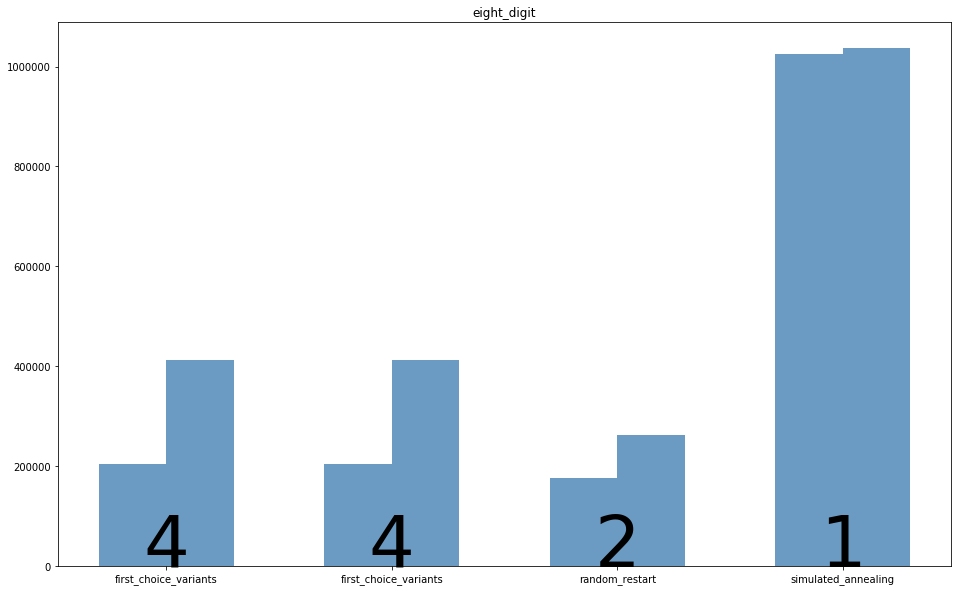

[[4, 203942, 411596], [4, 204096, 411918], [2, 175463, 262747], [1, 1025705, 1036872]]


In [4]:
show_bar_image(eight_digit_ans, 'eight_digit')
print(eight_digit_ans)

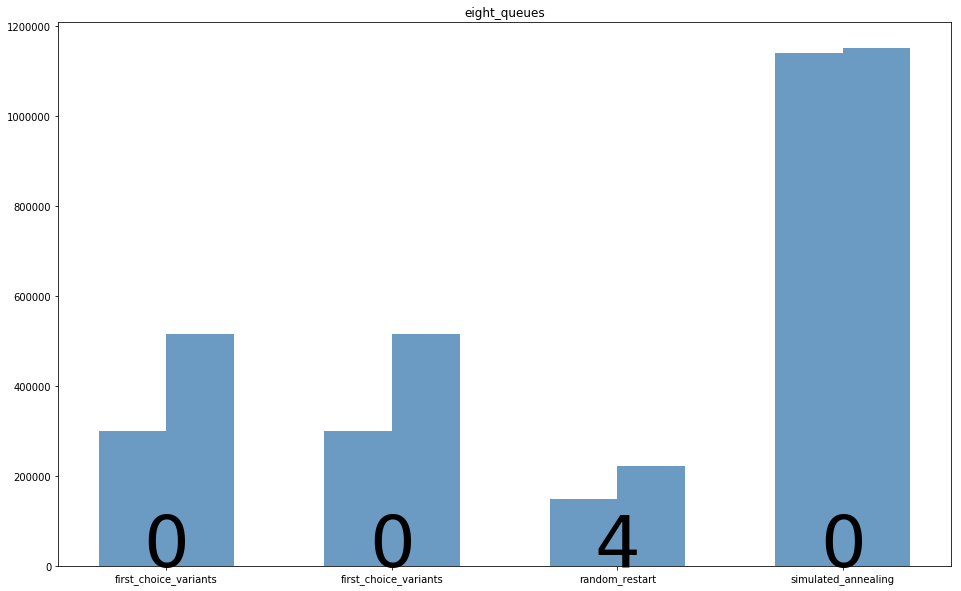

[[0, 299444, 515416], [0, 299640, 516623], [4, 147798, 221747], [0, 1139969, 1151230]]


In [5]:
show_bar_image(eight_queues_ans, 'eight_queues')
print(eight_queues_ans)